In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)

In [58]:
ds = """
[2 1]
[3 1] [3 2]
[4 1] [4 2] [4 3]
[5 1]
[6 1]
[7 1] [7 5] [7 6]
[8 1] [8 2] [8 3] [8 4]
[9 1] [9 3]
[10 3]
[11 1] [11 5] [11 6]
[12 1]
[13 1] [13 4]
[14 1] [14 2] [14 3] [14 4]
[17 6] [17 7]
[18 1] [18 2]
[20 1] [20 2]
[22 1] [22 2]
[26 24] [26 25]
[28 3] [28 24] [28 25]
[29 3]
[30 24] [30 27]
[31 2] [31 9]
[32 1] [32 25] [32 26] [32 29]
[33 3] [33 9] [33 15] [33 16] [33 19] [33 21] [33 23] [33 24] [33 30] [33 31] [33 32]
[34 9] [34 10] [34 14] [34 15] [34 16] [34 19] [34 20] [34 21] [34 23] [34 24] [34 27] [34 28] [34 29] [34 30] [34 31] [34 32] [34 33]
"""

In [59]:
A = np.zeros((34, 34))
for line in ds.splitlines():
    line = line.replace('[', '').replace(']', '')
    line = [int(x) for x in line.split()]
    line = list(zip(line[0::2], line[1::2]))
    for a, b in line:
        a -= 1
        b -= 1
        A[a, b] = 1
        A[b, a] = 1
        
A = A + np.identity(34)

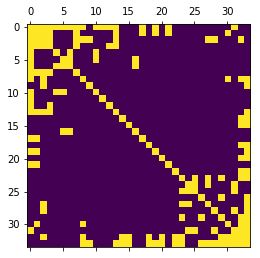

In [60]:
plt.matshow(A)

In [61]:
D = np.diag(A.sum(1))

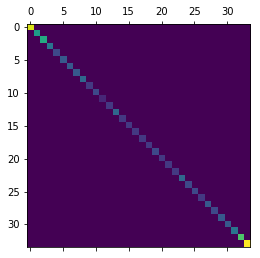

In [62]:
plt.matshow(D)

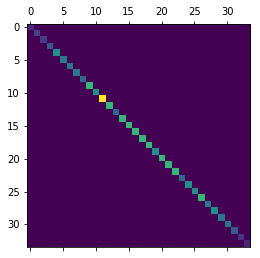

In [63]:
plt.matshow(np.linalg.inv(D))

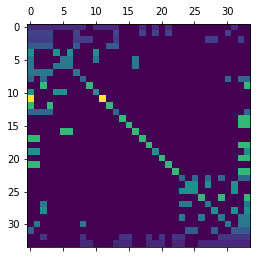

In [70]:
norm = np.linalg.inv(D).dot(A)
plt.matshow(norm)

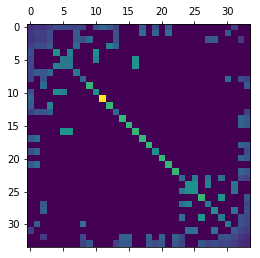

In [119]:
norm = np.linalg.inv(D ** 0.5)
A_norm = norm.dot(A).dot(norm)
plt.matshow(A_norm)

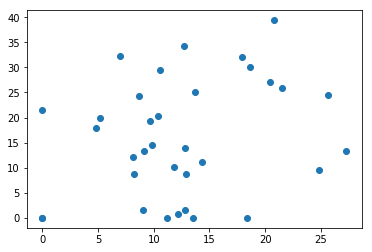

In [120]:
H = np.eye(34)
W = np.random.standard_normal((34, 256))
H = relu(A_norm.dot(H).dot(W))
W = np.random.standard_normal((256, 256))
H = relu(A_norm.dot(H).dot(W))
W = np.random.standard_normal((256, 2))
H = relu(A_norm.dot(H).dot(W))

plt.scatter(H[:, 0], H[:, 1])